# Quick Start

In [10]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import fbprophet
import pystan

In [12]:
assert fbprophet.__version__ >= '0.7.1', 'fbprophet 0.7.1 이상 필요'
assert pd.__version__ >= '1.0.4', 'pandas 1.0.4 이상 필요'
assert pystan.__version__ >= '2.19.1.1', 'pystan 2.19.1.1 이상 필요'

Prophet.make_future_dataframe


In [ ]:
df = pd.read_csv("./data_1907_2020.csv")

m = Prophet()
m.fit(df[-3650:])

future = m.make_future_dataframe(periods=30)
#future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Prophet.predict

yhat: 예측값

In [ ]:
forecast = m.predict(future)
#forecast.tail()

Prophet.plot

예측 데이터를 이용해 그래프를 그림

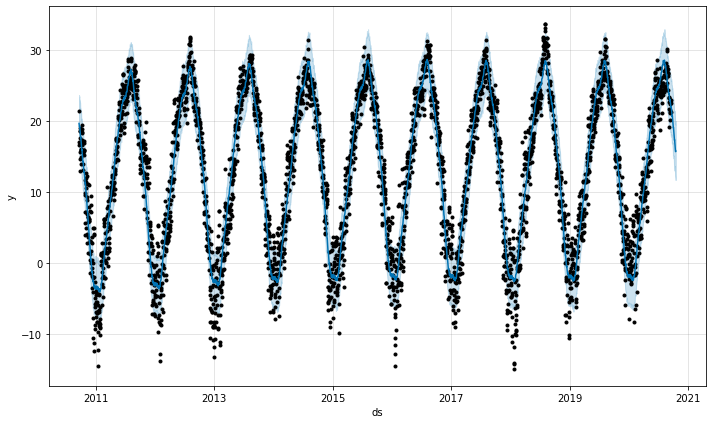

In [ ]:
fig1 = m.plot(forecast)

Prophet.plot_components
 데이터의 구성요소를 연, 월, 주 단위로 나눔

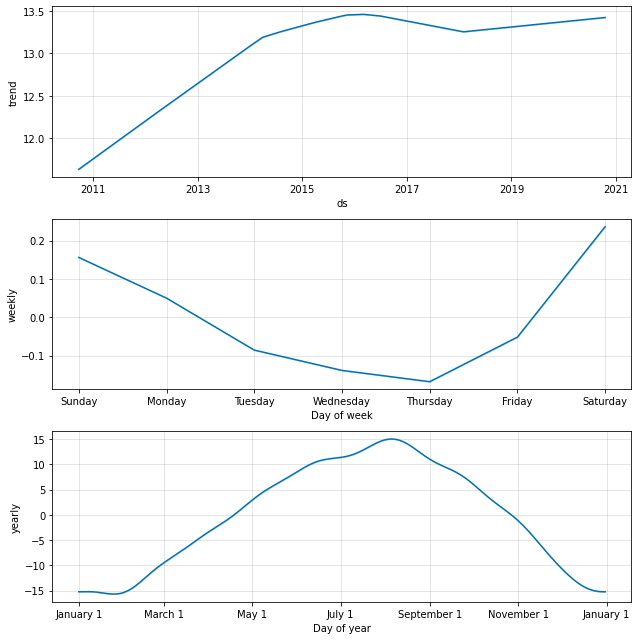

In [ ]:
fig2 = m.plot_components(forecast)

Prophet.plot.plot_plotly
또한 plotly를 이용해서 그래프를 그릴 수 있음

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

# Saturating Forecasts

상한, 하한을 정해서 예측

## Forecasting Growth

cap을 이용해 상한을 제한

In [ ]:
df_2 = df
df_2['cap'] = 50

In [ ]:
m = Prophet(growth='logistic')
m.fit(df_2[-3650:])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


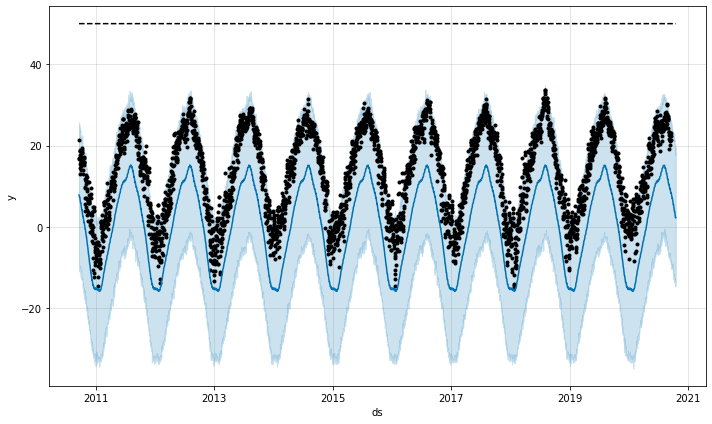

In [ ]:
future = m.make_future_dataframe(periods=30)
future['cap'] = 50
fcst = m.predict(future)
fig = m.plot(fcst)

## Saturating Minimum

floor를 이용해 하한값을 제한

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


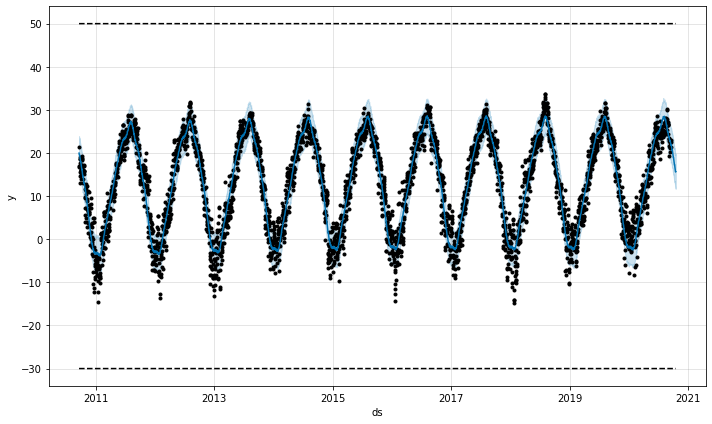

In [ ]:
df_2['floor'] = -30

m = Prophet(growth='logistic')
m.fit(df_2[-3650:])

future = m.make_future_dataframe(periods=30)
future['cap'] = 50
future['floor'] = -30

fcst = m.predict(future)
fig = m.plot(fcst)

# Trend ChangePoints

그래프의 트렌드가 변하는 지점을 자동으로 감지 및 직접 제어

## Automatic changepoint detection in Prophet

###### 변경점 자동 감지

###### 데이터의 해당 %의 크기만큼에서 잠재적 변경점 지정, 기본 80%

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

m = Prophet(changepoint_range=0.9)
m.fit(df[-3650:])
future = m.make_future_dataframe(periods=30)
fcst = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


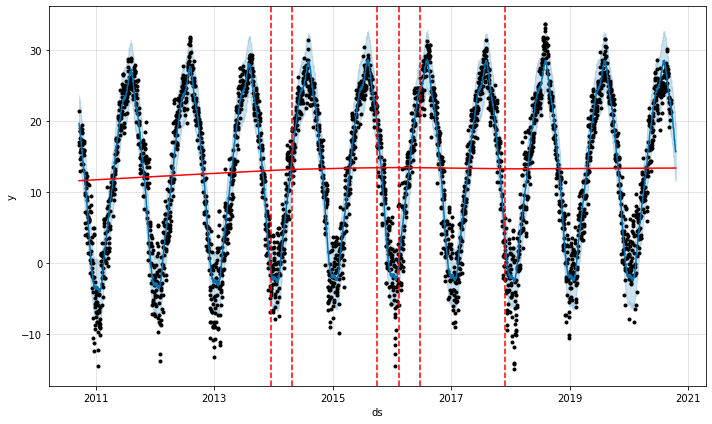

In [ ]:
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

## Adjusting trend flexibility

###### 트렌드가 Overfit, Underfit 인 경우 유연성을 조절 가능
###### 높을 수록 트렌드가 유연해지며 Underfit 해결 가능
###### 기본 0.05

In [ ]:
m = Prophet(changepoint_prior_scale=0.5)
fcst = m.fit(df[-3650:]).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


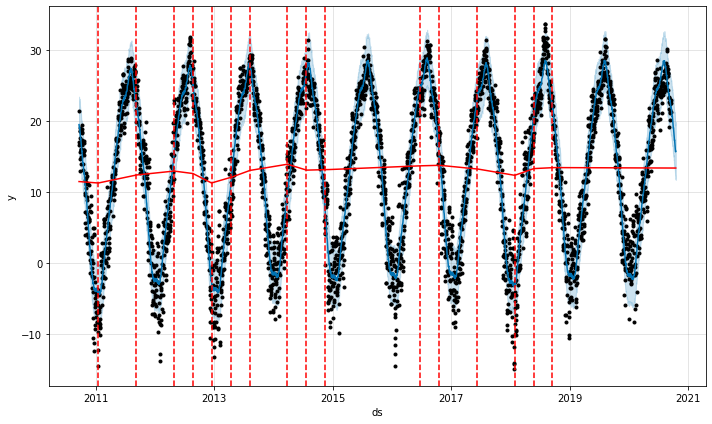

In [ ]:
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

## Specifying the locations of the changepoints

변경점을 직접 추가

In [ ]:
m = Prophet(changepoints=['2018-05-01'])
fcst = m.fit(df[-3650:]).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


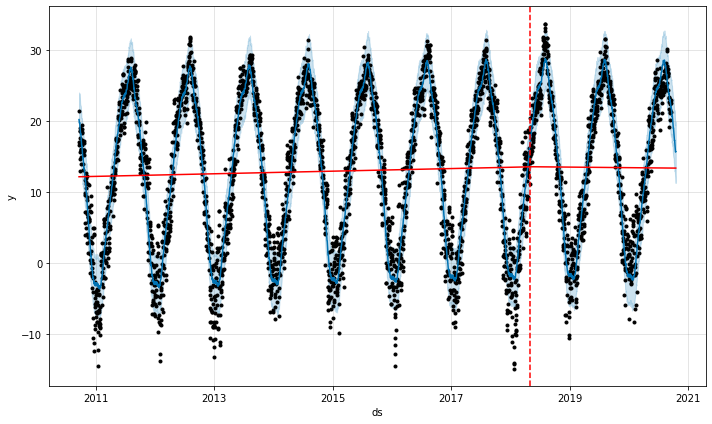

In [ ]:
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

# Seasonality, Holiday Effects, And Regressors

## Modeling Holidays and Special Events

###### 공휴일이나 특별한 이벤트를 설정하여 예측에 도움을 줌
###### 비나 태풍을 추가하면 괜찮을 듯 함
###### lower_window = 포함시킬 이전 일수
###### upper_window = 포함시킬 이후 일수

## Built-in Country Holidays

내장된 나라별 공휴일 설정

In [ ]:
m = Prophet()
m.add_country_holidays(country_name='KR')
m.fit(df[-3650:])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m.train_holiday_names

0                                       New Year's Day
1            The day preceding of Lunar New Year's Day
2                                 Lunar New Year's Day
3               The second day of Lunar New Year's Day
4          Alternative holiday of Lunar New Year's Day
5                            Independence Movement Day
6                               Birthday of the Buddha
7                                       Children's Day
8                                           Labour Day
9                                         Memorial Day
10                                      Liberation Day
11                        The day preceding of Chuseok
12                                             Chuseok
13                           The second day of Chuseok
14                             National Foundation Day
15                                         Hangeul Day
16                                       Christmas Day
17               Alternative holiday of new Year's Day
18        

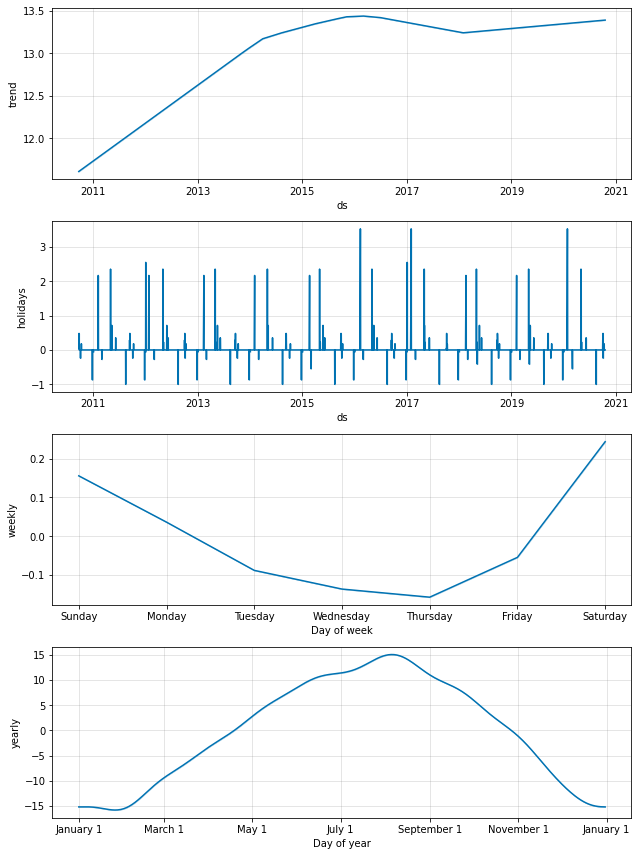

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
fig = m.plot_components(forecast)


## Fourier Order for Seasonalities

푸리에 급수를 이용한 것.

연간 트렌드의 유연성 설정.
강도를 높이면 Overfit 발생

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


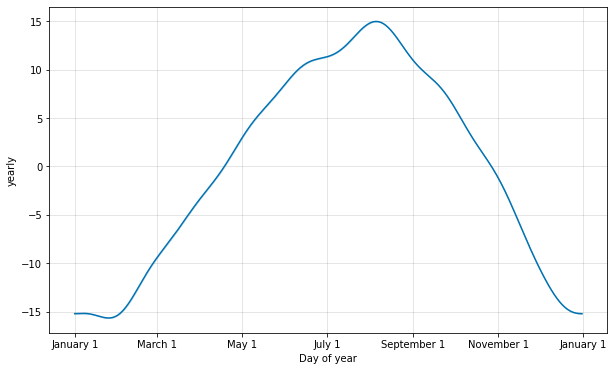

In [ ]:
from fbprophet.plot import plot_yearly
m = Prophet().fit(df[-3650:])
a = plot_yearly(m)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


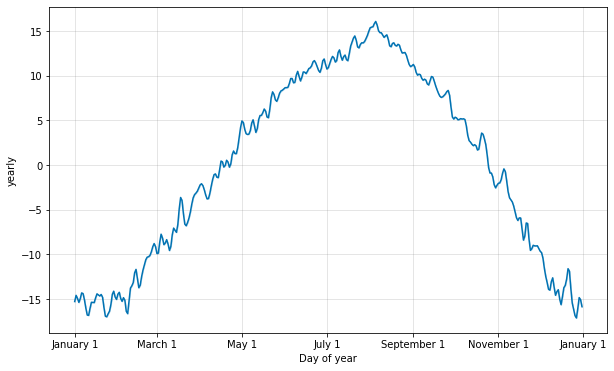

In [ ]:
m = Prophet(yearly_seasonality=100).fit(df[-3650:])
a = plot_yearly(m)

## Specifying Custom Seasonalities

사용자 설정 트렌드 생성

기본적으로 weekly와 yearly 만 있으므로 monthly를 추가로 설정. 

한달의 주기를 30.5일로 설정

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


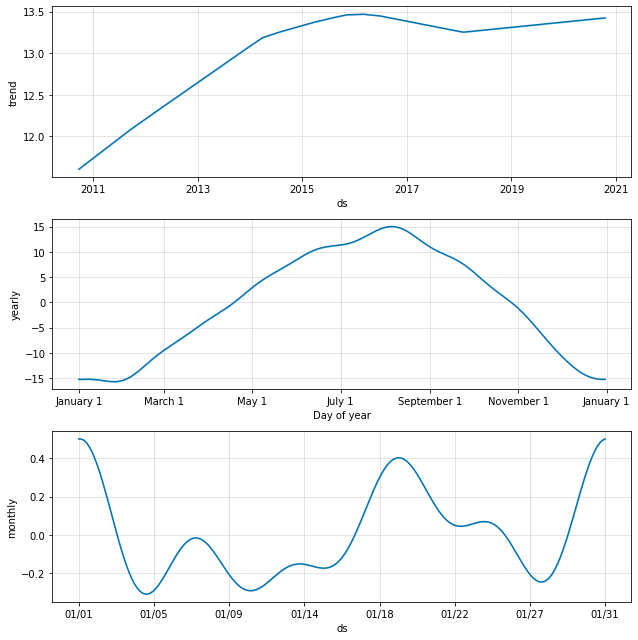

In [ ]:
m = Prophet(weekly_seasonality=False)

m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

forecast = m.fit(df[-3650:]).predict(future)

fig = m.plot_components(forecast)


## Seasonalities that depend on other factors

Seasonalities는 다른 요인에 의해 달라질 수 있음

숙박업 매출의 경우, 비수기와 성수기에 따라서 달라질 수 있으므로 이를 조건부 계절성을 사용하여 설정 가능

In [ ]:
# 8월부터 2월까지는 True, 그 외는 False로 설정

def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df_3 = df

df_3['on_season'] = df_3['ds'].apply(is_nfl_season)
df_3['off_season'] = ~df_3['ds'].apply(is_nfl_season)

df_3

,ds,y,cap,floor,on_season,off_season
0,1907-10-01,13.5,50,-30,True,False
1,1907-10-02,16.2,50,-30,True,False
2,1907-10-03,16.2,50,-30,True,False
3,1907-10-04,16.5,50,-30,True,False
4,1907-10-05,17.6,50,-30,True,False
...,...,...,...,...,...,...
42807,2020-09-13,21.5,50,-30,True,False
42808,2020-09-14,21.3,50,-30,True,False
42809,2020-09-15,23.0,50,-30,True,False
42810,2020-09-16,22.5,50,-30,True,False


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


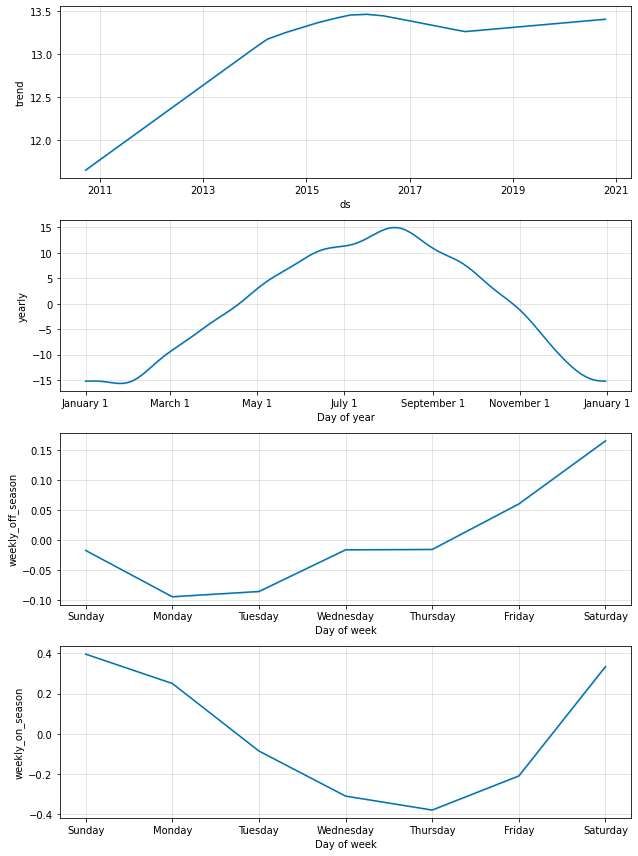

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df_3[-3650:]).predict(future)
fig = m.plot_components(forecast)

## Prior scale for holidays and seasonality

Seasonality 또는 holidays가 overfit, underfit 된 경우 holidays_prior_scale을 조절하여 해결 가능.

기본값 = 10

아래는 데이터가 없어 작동하지 않는 예

In [ ]:
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

Seasnonality는 prior_scale을 조절하여 유연성 설정 가능

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


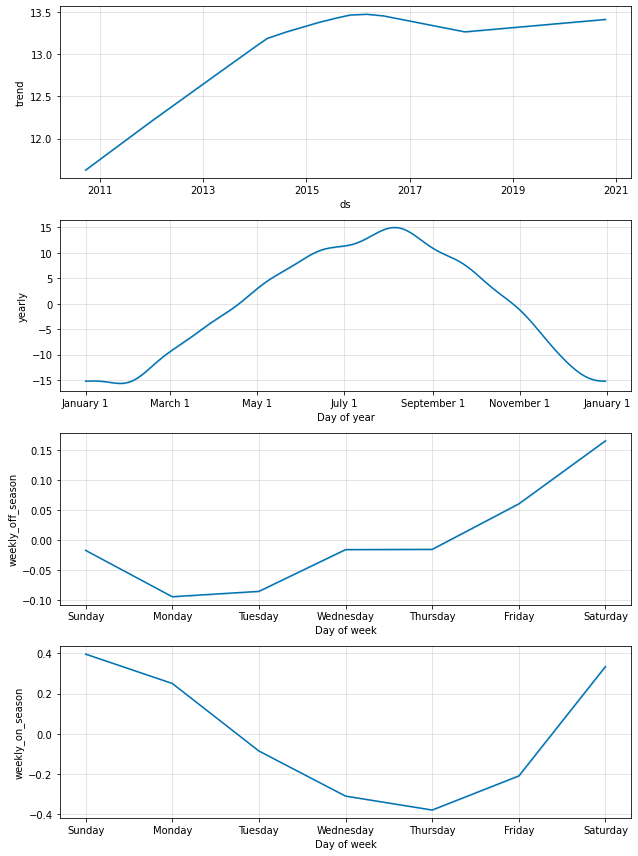

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season', prior_scale=0.1)
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season', prior_scale=0.1)

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df_3[-3650:]).predict(future)
fig = m.plot_components(forecast)

## Additional regressors

특정 요일에 추가 효과를 줄 수 있음

아래는 NFL 시즌의 일요일에 추가 효과를 주는 것으로 작동만 되며 의미는 없음

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


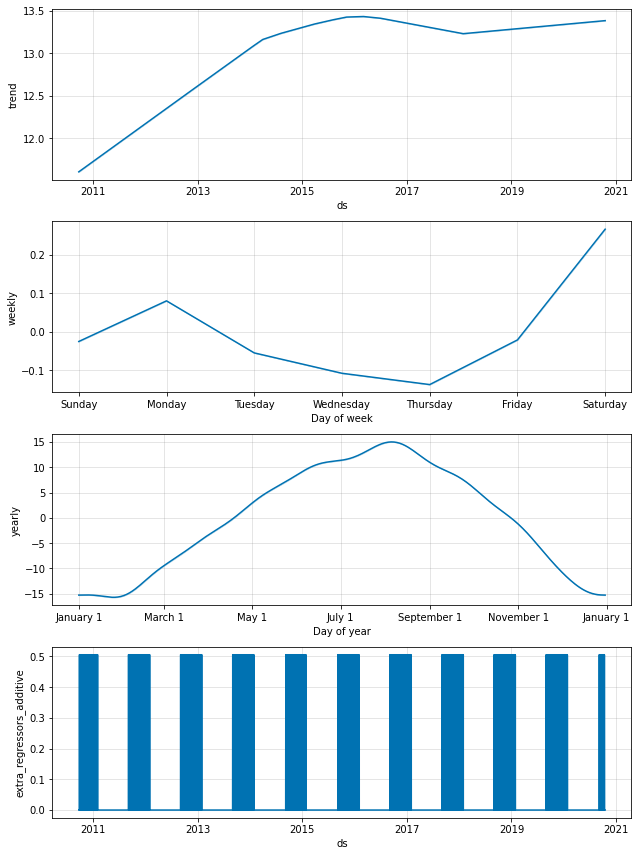

In [ ]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df[-3650:])

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)

# Multiplicative Seasonality

증가하거나 점점 범위가 넓어지는 계절성을 가진 모델을 예측할 때 유용

계절별 온도차가 심해지는 경우에 유용

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


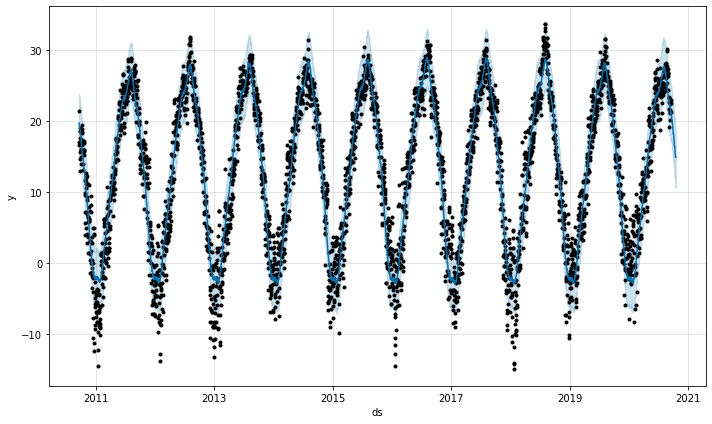

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df[-3650:])
forecast = m.predict(future)
fig = m.plot(forecast)

# Uncertainty Intervals

불확실성의 범위

## Uncertainty in the trend

예측 값의 불확실성 범위 

기본 80%

그래프가 2번 뜨는 이유는 모르겠음

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


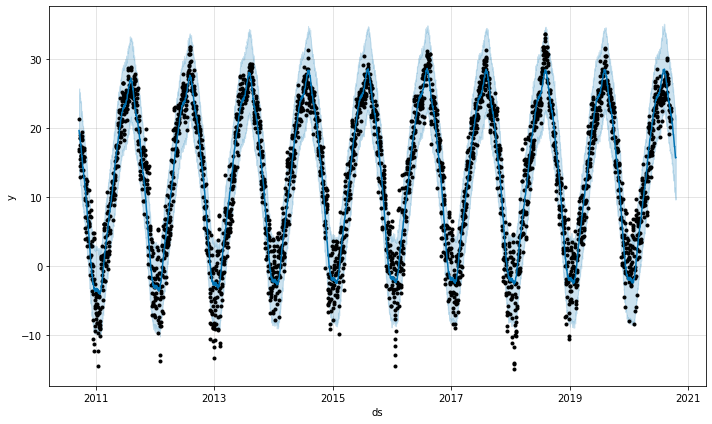

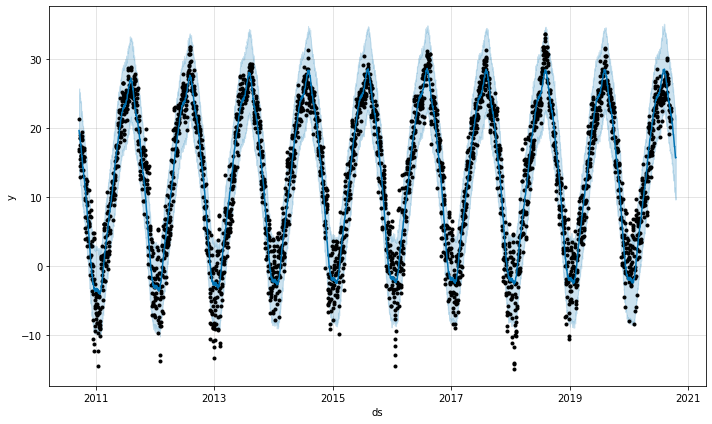

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(df[-3650:])
future = m.make_future_dataframe(periods=30)
fcst = m.predict(future)
m.plot(fcst)

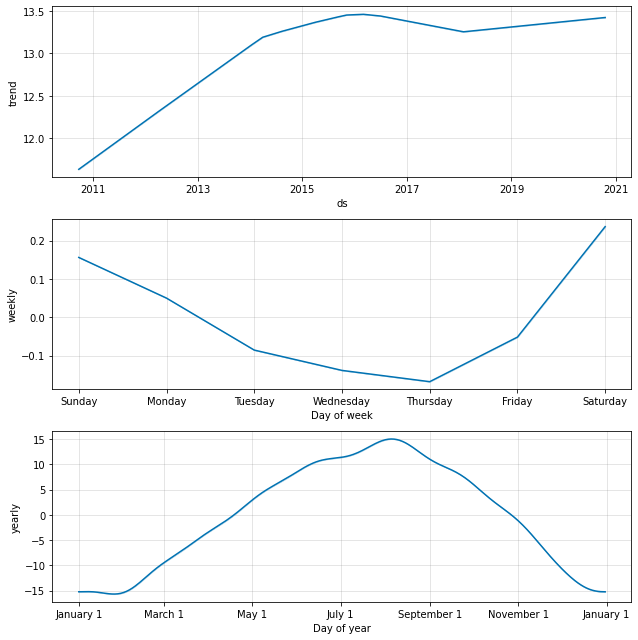

In [ ]:
fig = m.plot_components(fcst)

## Uncertainty in seasonality

계절성의 불확실성

베이지안 샘플링 이용

mcmc_samples

기본값 0

하단의 예는 최초 300일에 대해 적용하는 예시

In [ ]:
m = Prophet(mcmc_samples=300)

In [ ]:
m.fit(df[-3650:]) # 실행시간 오래걸림

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [ ]:
forecast = m.predict(future) 

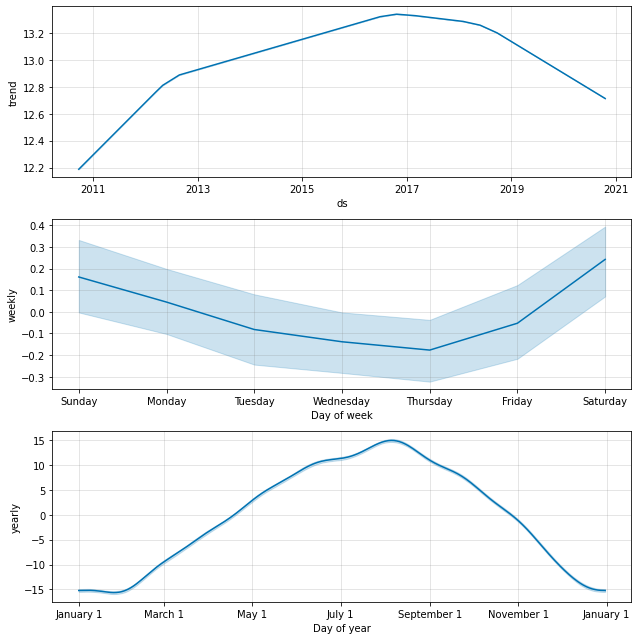

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
m.predictive_samples(future)

# Outliers

이상치가 예측에 영향을 미치므로 제거하는 방법

1. 특정 기간에 이상치가 집중된 경우

  특정 구간을 None으로 설정

In [ ]:
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None

model = Prophet().fit(df)

fig = model.plot(model.predict(future))

2. 특정 범위를 넘어가는 이상치가 여러 군데에 분포한 경우

  특정 값을 넘어가는 데이터만 None으로 설정

# Non-Daily Data

## Sub-daily data

5분 간격의 데이터도 예측에 이용 가능



## Data with regular gaps

매일 5분 간격으로 00시부터 06시까지의 데이터만 가지고도 예측 가능


## Monthly data
매월 1일에 대한 데이터만 있어도 예측 가능

## Holidays with aggregated data


# Diagnostics

교차검증기능이 있음

아래 그림은 최초 5년간의 데이터를 이용해 그 다음 1년을 예측하고, 실제 데이터를 이용해 검증하는 것

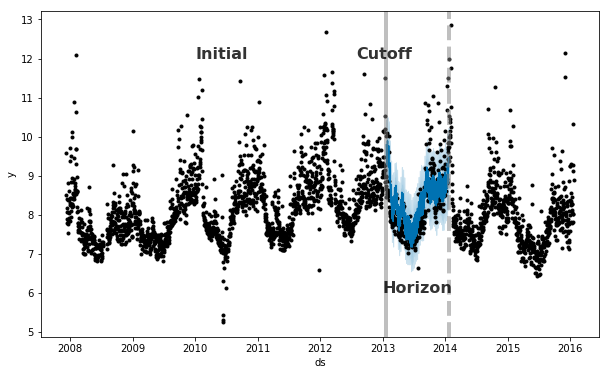

In [ ]:
from fbprophet.diagnostics import cross_validation
df = pd.read_csv("./data_1907_2020.csv")
m = Prophet()
m.fit(df[-3650:])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 15 forecasts with cutoffs between 2012-10-24 00:00:00 and 2019-09-18 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-10-25,14.446122,10.435999,18.222661,15.2,2012-10-24
1,2012-10-26,14.293630,10.373073,18.243430,15.9,2012-10-24
2,2012-10-27,14.319158,10.352468,18.037690,14.3,2012-10-24
3,2012-10-28,14.282673,10.426169,17.926619,14.3,2012-10-24
4,2012-10-29,13.935930,10.224008,17.663029,11.7,2012-10-24


cutoff 날짜를 임의로 입력 가능

In [ ]:
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')
df_cv2.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-02-16,-0.857983,-4.753327,3.605245,-2.6,2013-02-15
1,2013-02-17,-0.468900,-4.470028,3.794405,2.3,2013-02-15
2,2013-02-18,-0.291445,-4.469484,3.542425,0.5,2013-02-15
3,2013-02-19,0.129143,-3.848923,4.356698,-2.9,2013-02-15
4,2013-02-20,0.203922,-3.795085,4.051412,-4.8,2013-02-15


RMSE: Root Mean Square Error  
MSE: Mean Square Error  
MAE: Mean Absolute Error  
MDAPE: Median Absolute Prediction Error  

mse, mae 등의 용어는 다음 링크 참고

https://partrita.github.io/posts/regression-error/

오차 및 오차율 확인 가능

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,9.835698,3.136192,2.493288,0.133392,0.776234
1,38 days,9.903961,3.147056,2.509502,0.135919,0.771725
2,39 days,9.914303,3.148699,2.517180,0.135919,0.771603
3,40 days,9.996804,3.161772,2.523359,0.136254,0.772456
4,41 days,10.144623,3.185062,2.540350,0.136254,0.766971


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

## Parallelizing cross validation

교차검증의 병렬화는 다음 파라미터를 조절함으로써 설정 가능

###parallel

* None : 기본, 병렬처리 하지 않음
* 'processes' : Parallelize with concurrent.futures.ProcessPoolExectuor.
* 'threads' : Parallelize with concurrent.futures.ThreadPoolExecutor.
    Note that some operations currently hold Python's Global Interpreter
    Lock, so parallelizing with threads may be slower than training
    sequentially.
* 'dask': Dask로 병렬처리. dask.distributed Client 이 필요함
* object : Any instance with a `.map` method. This method will
  be called with `single_cutoff_forecast` and a sequence of
  iterables where each element is the tuple of arguments to pass to
  `single_cutoff_forecast`

In [ ]:
from fbprophet.diagnostics import cross_validation
df = pd.read_csv("./data_1907_2020.csv")
m = Prophet()
m.fit(df[-3650:])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
from dask.distributed import Client

client = Client()  # dask 사용시 필요

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days', parallel="processes")

/usr/local/lib/python3.6/dist-packages/distributed/bokeh/core.py:57: UserWarning:


Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.

INFO:fbprophet:Making 15 forecasts with cutoffs between 2012-10-24 00:00:00 and 2019-09-18 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2678373a90>


## Hyperparameter tuning

In [ ]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2677361e80>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f267736eb38>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2671c11fd0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2678603da0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in par

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  2.753411
1                     0.001                     0.10  2.762134
2                     0.001                     1.00  2.763271
3                     0.001                    10.00  2.763607
4                     0.010                     0.01  2.688957
5                     0.010                     0.10  2.688815
6                     0.010                     1.00  2.695567
7                     0.010                    10.00  2.691588
8                     0.100                     0.01  2.752182
9                     0.100                     0.10  2.762239
10                    0.100                     1.00  2.761342
11                    0.100                    10.00  2.759737
12                    0.500                     0.01  2.770102
13                    0.500                     0.10  2.777792
14                    0.500                     1.00  2

In [ ]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

# Additional Topics

## Saving models

나중에 불러와서 사용할 수 있도록 Prophet 모델을 저장할 수 있음

In [ ]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

with open('serialized_model.json', 'r') as fin:
    m = model_from_json(json.load(fin))  # Load model

## Flat trend and custom trends

트렌드 = 연간 기온 상승

트렌드보다 계절성의 성향이 강한경우 트렌드의 성장률을 균일하게 유지할 수 있음

growth 파라미터를 조절하여 설정가능

In [ ]:
m = Prophet(growth='flat')

## Updating fitted models

이미 fit 된 모델에 새 데이터를 업데이트 할 때 사용

In [ ]:
# Python
def stan_init(m):
    """Retrieve parameters from a trained model.
    
    Retrieve parameters from a trained model in the format
    used to initialize a new Stan model.
    
    Parameters
    ----------
    m: A trained model of the Prophet class.
    
    Returns
    -------
    A Dictionary containing retrieved parameters of m.
    
    """
    res = {}
    for pname in ['k', 'm', 'sigma_obs']:
        res[pname] = m.params[pname][0][0]
    for pname in ['delta', 'beta']:
        res[pname] = m.params[pname][0]
    return res

df = pd.read_csv('../examples/example_wp_log_peyton_manning.csv')
df1 = df.loc[df['ds'] < '2016-01-19', :]  # All data except the last day
m1 = Prophet().fit(df1) # A model fit to all data except the last day


%timeit m2 = Prophet().fit(df)  # Adding the last day, fitting from scratch
%timeit m2 = Prophet().fit(df, init=stan_init(m1))  # Adding the last day, warm-starting from m1


# 원리

## Model Components

### y(t) = g(t) + s(t) + h(t) + error
> g: Growth  
s: Seasonality  
h: Holidays, Events


### Growth
> Linear Growth  
Non-Linear Growth(Logistic Growth)

### Seasonality

> 주기적으로 나타나는 패턴은 Fourier Series를 이용해서 근사치를 찾음

### Holidays

> 주기성을 가지지는 않지만 전체 추세에 영향을 주는 이벤트로, 앞뒤로 window범위를 지정해서 해당 이벤트가 미치는 영향의 범위를 설정 할 수 있음

## Model Fitting

> Stan을 통해 모델을 학습시킴  
<br>
> MAP(Maximum A Posteriori), MCMC(MarkovChain Monte Carlo) 두 방식이 있음
>> MAP(Maximum A Posteriori)  
     - 속도가 훨씬 빠름  
MCMC(MarkovChain Monte Carlo)  
     - 모형의 변동성을 더 자세히 볼 수 있음

# 함수 정리

## Prophet


함수 파라미터

맨 앞에 오는 것이 default  
<br>
<br>
1. growth: 'linear', 'logistic'


2. changepoints: None
> List of dates at which to include potential changepoints. If not specified, potential changepoints are selected automatically.

3. n_changepoints: 25
> Number of potential changepoints to include. Not used if input changepoints is supplied. If changepoints is not supplied, then n_changepoints potential changepoints are selected uniformly from the first changepoint_range proportion of the history.

4. changepoint_range: 0.8
> changepoint의 자동감지 범위  
Proportion of history in which trend changepoints will be estimated. Defaults to 0.8 for the first 80%. Not used if changepoints is specified.

5. yearly_seasonality: 'auto', True, False, or a number of Fourier terms to generate.
> Fit yearly seasonality.

6. weekly_seasonality: 'auto', True, False, or a number of Fourier terms to generate.
> Fit weekly seasonality.

7. daily_seasonality: 'auto', True, False, or a number of Fourier terms to generate.
> Fit daily seasonality.

8. holidays: None
> 공휴일 및 이벤트를 dataframe 형식으로 입력  
pd.DataFrame with columns holiday (string) and ds (date type) and optionally columns lower_window and upper_window which specify a range of days around the date to be included as holidays. lower_window=-2 will include 2 days prior to the date as holidays. Also optionally can have a column prior_scale specifying the prior scale for that holiday.

9. seasonality_mode: 'additive', 'multiplicative'.
> additive는 추세만 점점 증가하는 경우  
multiplicative는 추세뿐만 아니라 값의 범위도 증가하는 경우 

10. seasonality_prior_scale: 10.0
> Parameter modulating the strength of the seasonality model. Larger values allow the model to fit larger seasonal fluctuations, smaller values dampen the seasonality. Can be specified for individual seasonalities using add_seasonality.

11. holidays_prior_scale: 10.0
> holidays 가 모델에 미치는 영향의 정도를 설정  
Parameter modulating the strength of the holiday components model, unless overridden in the holidays input.

12. changepoint_prior_scale: 0.05
> changepoint의 유연성 조절. 낮으면 underfit, 높으면 overfit 발생  
Parameter modulating the flexibility of the automatic changepoint selection. Large values will allow many changepoints, small values will allow few changepoints.

13. mcmc_samples: 0
> Integer, if greater than 0, will do full Bayesian inference with the specified number of MCMC samples. If 0, will do MAP estimation.

14. interval_width: 0.8
> 예측 값의 불확실성 범위 설정  
Float, width of the uncertainty intervals provided for the forecast. If mcmc_samples=0, this will be only the uncertaintyin the trend using the MAP estimate of the extrapolated generative model. If mcmc.samples>0, this will be integrated over all model parameters, which will include uncertainty in seasonality.

15. uncertainty_samples: 1000
> Number of simulated draws used to estimate uncertainty intervals. Settings this value to 0 or False will disable uncertainty estimation and speed up the calculation.

16. stan_backend: None
> str as defined in StanBackendEnum default: None - will try to iterate over all available backends and find the working one

## Prophet.fit


함수 파라미터
1. df: 필수입력
> pd.DataFrame containing the history. Must have columns ds (date type) and y, the time series. If self.growth is 'logistic', then df must also have a column cap that specifies the capacity at each ds.

2. kwargs: 
> Additional arguments passed to the optimizing or sampling functions in Stan.


## Prophet.predict

함수 파라미터

1. df: None
> make_future_dataframe 의 return 값을 파라미터로 받음  
pd.DataFrame with dates for predictions (column ds), and capacity (column cap) if logistic growth. If not provided, predictions are made on the history.


## Prophet.plot

함수 파라미터

1. m: 필수입력 
> Prophet model.

2. fcst: 필수입력
> pd.DataFrame output of m.predict.

3. ax: None
> Optional matplotlib axes on which to plot.

4. uncertainty: True
> Optional boolean to plot uncertainty intervals, which will only be done if m.uncertainty_samples > 0.

5. plot_cap: True
> Optional boolean indicating if the capacity should be shown in the figure, if available.

6. xlabel: 'ds'
> x 축으로 사용할 데이터의 이름

7. ylabel: 'y'
> y 축으로 사용할 데이터의 이름

8. figsize: (10, 6)
> Optional tuple width, height in inches.


## Prophet.plot_components

함수 파라미터

1. fcst: 필수입력
> pd.DataFrame output of self.predict.

2. uncertainty: True
> Optional boolean to plot uncertainty intervals.

3. plot_cap: True
> Optional boolean indicating if the capacity should be shown in the figure, if available.

4. weekly_start: 0 
> Optional int specifying the start day of the weekly seasonality plot. 0 (default) starts the week on Sunday. 1 shifts by 1 day to Monday, and so on.

5. yearly_start: 0 
> Optional int specifying the start day of the yearly seasonality plot. 0 (default) starts the year on Jan 1. 1 shifts by 1 day to Jan 2, and so on.

6. figsize: None
> Optional tuple width, height in inches.

## Prophet.make_future_dataframe

함수 파라미터

1. periods: 필수입력
> 앞으로 예측할 기간

2. freq: 'D'
> Any valid frequency for pd.date_range, such as 'D' or 'M'.

3. include_history: True
> Boolean to include the historical dates in the dataframe for predictions.


# 참고자료

https://facebook.github.io/prophet/docs/outliers.html

https://zamezzz.tistory.com/category/IT/Ai

https://zzsza.github.io/data/2019/02/06/prophet/

https://gorakgarak.tistory.com/1255

https://dacon.io/codeshare/1527?dtype=recent

프레젠테이션 형식의 간단한 설명: https://www.slideshare.net/lumiamitie/facebook-prophet

https://be-favorite.tistory.com/64




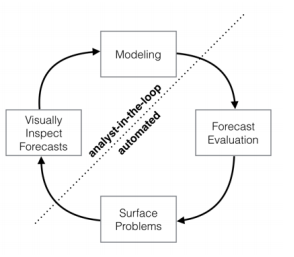